In [1]:
using Downloads

#download_covid = Downloads.download("https://api.covidtracking.com/v1/us/daily.csv",
#                                    "covid_us.csv")

In [2]:
using DataFrames, CSV, Plots, Dates

columns = [:date, :totalTestResultsIncrease]
fmt = "yyyymmdd"
t = Dict(:date=>Date)

covid_df = CSV.read("covid_us.csv",
                    DataFrame,
                    dateformat=fmt,
                    select=columns,
                    types=t)

covid_df = sort(filter(row -> row.totalTestResultsIncrease > 0, covid_df))
last(covid_df,5)

Row,date,totalTestResultsIncrease
,Date,Int64
1,2021-03-03,1406795
2,2021-03-04,1590984
3,2021-03-05,1744417
4,2021-03-06,1430992
5,2021-03-07,1170059


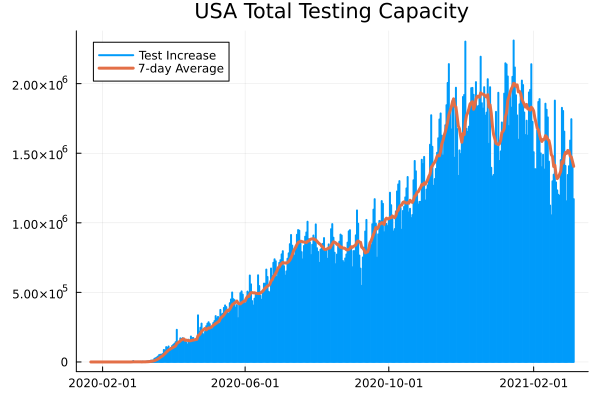

In [3]:
using RollingFunctions

# plot daily test increase as sticks
Plots.plot(covid_df.date,
    covid_df.totalTestResultsIncrease,
    seriestype=:sticks,
    label="Test Increase",
    title = "USA Total Testing Capacity",
    lw = 2)

# 7-day average using rolling mean
window = 7
average = rollmean(covid_df.totalTestResultsIncrease, window)

# we mutate the existing plot
Plots.plot!(covid_df.date,
    cat(zeros(window - 1), average, dims=1),
    label="7-day Average",
    lw=3)